In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
globalancestrydf = pd.read_csv('GlobalAncestry.csv')

print(globalancestrydf.tail())

           ancestry  pos1  pos2  pos3  pos4  pos5  pos6  pos7  pos8  pos9  \
237         Mexican     0     2     1     2     0     1     1     0     1   
238  NativeAmerican     1     2     1     2     0     1     2     0     0   
239         Mexican     0     2     0     2     1     0     2     0     1   
240       EastAsian     0     2     0     1     0     0     2     0     1   
241       EastAsian     0     0     1     2     2     0     2     0     1   

     ...  pos8907  pos8908  pos8909  pos8910  pos8911  pos8912  pos8913  \
237  ...        1        1        1        0        1        1        2   
238  ...        2        0        1        0        1        0        2   
239  ...        0        0        1        2        1        0        2   
240  ...        1        0        0        0        0        2        2   
241  ...        0        0        0        1        0        1        2   

     pos8914  pos8915  pos8916  
237        0        0        0  
238        0        

In [2]:
train = globalancestrydf[globalancestrydf['ancestry'].isin(['African', 'European', 'EastAsian', 'Oceanian', 'NativeAmerican'])]
print(train)

           ancestry  pos1  pos2  pos3  pos4  pos5  pos6  pos7  pos8  pos9  \
0         EastAsian     0     2     1     1     0     0     2     1     1   
1          Oceanian     0     0     0     1     0     2     2     0     0   
3         EastAsian     0     2     0     1     1     0     2     1     1   
4           African     0     0     0     1     0     2     2     1     0   
5         EastAsian     0     1     0     0     0     0     2     0     2   
..              ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
235       EastAsian     1     1     2     1     0     1     2     0     2   
236         African     0     0     0     0     0     1     2     0     0   
238  NativeAmerican     1     2     1     2     0     1     2     0     0   
240       EastAsian     0     2     0     1     0     0     2     0     1   
241       EastAsian     0     0     1     2     2     0     2     0     1   

     ...  pos8907  pos8908  pos8909  pos8910  pos8911  pos8912  pos8913  \


In [3]:
test = globalancestrydf[globalancestrydf['ancestry'].isin(['Unknown1', 'Unknown2', 'Unknown3', 'Unknown4', 'Unknown5'])]
print(test)

     ancestry  pos1  pos2  pos3  pos4  pos5  pos6  pos7  pos8  pos9  ...  \
31   Unknown1     1     2     1     2     2     0     2     0     2  ...   
132  Unknown2     1     0     1     1     1     2     2     0     0  ...   
165  Unknown4     2     2     1     0     1     1     1     0     1  ...   
173  Unknown3     0     2     1     1     0     2     2     0     0  ...   
177  Unknown5     0     2     1     1     0     2     2     0     0  ...   

     pos8907  pos8908  pos8909  pos8910  pos8911  pos8912  pos8913  pos8914  \
31         0        0        0        0        0        0        1        0   
132        2        0        1        1        0        0        1        0   
165        1        0        0        2        0        0        1        0   
173        0        0        0        0        1        1        2        0   
177        0        0        0        0        1        2        1        0   

     pos8915  pos8916  
31         0        0  
132        0        

In [4]:
testmex = globalancestrydf[globalancestrydf['ancestry']=='Mexican']
print(testmex)

    ancestry  pos1  pos2  pos3  pos4  pos5  pos6  pos7  pos8  pos9  ...  \
2    Mexican     1     0     2     2     0     1     0     0     1  ...   
6    Mexican     0     2     2     2     1     1     2     0     0  ...   
7    Mexican     1     2     1     2     0     0     2     0     0  ...   
11   Mexican     0     2     2     2     1     2     1     0     1  ...   
18   Mexican     0     2     1     2     0     0     2     0     0  ...   
33   Mexican     0     2     1     1     1     0     2     0     1  ...   
34   Mexican     1     1     1     2     1     1     1     0     0  ...   
36   Mexican     1     1     1     1     0     2     2     0     1  ...   
51   Mexican     0     1     1     2     0     1     2     0     2  ...   
52   Mexican     0     2     1     1     0     2     2     0     1  ...   
55   Mexican     1     0     0     2     1     1     2     0     2  ...   
60   Mexican     0     1     1     1     2     0     2     0     1  ...   
61   Mexican     1     1 

In [5]:
print(train)

           ancestry  pos1  pos2  pos3  pos4  pos5  pos6  pos7  pos8  pos9  \
0         EastAsian     0     2     1     1     0     0     2     1     1   
1          Oceanian     0     0     0     1     0     2     2     0     0   
3         EastAsian     0     2     0     1     1     0     2     1     1   
4           African     0     0     0     1     0     2     2     1     0   
5         EastAsian     0     1     0     0     0     0     2     0     2   
..              ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
235       EastAsian     1     1     2     1     0     1     2     0     2   
236         African     0     0     0     0     0     1     2     0     0   
238  NativeAmerican     1     2     1     2     0     1     2     0     0   
240       EastAsian     0     2     0     1     0     0     2     0     1   
241       EastAsian     0     0     1     2     2     0     2     0     1   

     ...  pos8907  pos8908  pos8909  pos8910  pos8911  pos8912  pos8913  \


In [6]:
X = train.copy(deep=True)

In [7]:
X.drop(columns=['ancestry'], inplace=True)

In [8]:
#y=train['ancestry'].copy(deep=True)
#print(y)

In [9]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

In [10]:
#y = labelEncoder.fit_transform(y)

In [11]:
Y = train.copy(deep=True)
Y['ancestry'] = labelEncoder.fit_transform(Y['ancestry'])
y = Y['ancestry']
print(y)

0      1
1      4
3      1
4      0
5      1
      ..
235    1
236    0
238    3
240    1
241    1
Name: ancestry, Length: 183, dtype: int32


In [12]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

alphanum = [0.001, 0.01, 0.1, 1, 10, 100]
ridgecv = RidgeCV(alphas=alphanum, cv=10)
ridgecv.fit(X, y)
optimal_alpha = ridgecv.alpha_

In [13]:
ridge_model = Ridge(alpha=optimal_alpha)
cvs = cross_val_score(ridge_model, X, y, cv=10) 
mean_cvs= np.mean(cvs)
print("Optimal alpha:", optimal_alpha)
print("Mean cross-validation score:", mean_cvs)

Optimal alpha: 0.001
Mean cross-validation score: 0.9828925529102552


temp = test.copy(deep=True)
temp.drop(columns=['ancestry'], inplace=True)
X_test = temp.copy(deep=True)
print(X_test)

In [14]:
ridge_model.fit(X, y)
predictions = ridge_model.predict(X)
print(predictions)

[1.00000006e+00 3.99999996e+00 1.00000007e+00 9.71554927e-08
 1.00000008e+00 2.99999998e+00 2.00000001e+00 1.00000003e+00
 1.00000007e+00 1.99999999e+00 6.26657657e-08 1.00000012e+00
 3.00000000e+00 2.99999998e+00 1.00000004e+00 1.00000002e+00
 1.99999995e+00 1.00000006e+00 2.00000001e+00 1.00000005e+00
 1.00000002e+00 1.00000008e+00 1.99999997e+00 1.00000004e+00
 2.99999993e+00 2.99999995e+00 1.00000006e+00 5.84577356e-08
 1.00000006e+00 1.15478752e-08 1.00000007e+00 5.16029620e-08
 2.99999994e+00 2.00000000e+00 2.99999998e+00 8.80444010e-08
 2.99999994e+00 3.00000004e+00 2.00000003e+00 2.00000001e+00
 1.00000003e+00 1.00000005e+00 2.99999989e+00 3.99999997e+00
 2.00000002e+00 1.00000005e+00 2.99999995e+00 1.00000003e+00
 4.23313100e-08 2.99999998e+00 4.25791479e-08 2.00000004e+00
 3.99999985e+00 2.00000003e+00 1.10137108e-08 9.99999980e-01
 1.00000004e+00 1.00000005e+00 1.00000005e+00 1.00000004e+00
 1.05877146e-07 2.99999999e+00 3.99999986e+00 7.87108220e-08
 1.00000007e+00 3.999999

In [15]:
rounded_predictions = [round(value) for value in predictions] 
print(rounded_predictions)

[1, 4, 1, 0, 1, 3, 2, 1, 1, 2, 0, 1, 3, 3, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 3, 3, 1, 0, 1, 0, 1, 0, 3, 2, 3, 0, 3, 3, 2, 2, 1, 1, 3, 4, 2, 1, 3, 1, 0, 3, 0, 2, 4, 2, 0, 1, 1, 1, 1, 1, 0, 3, 4, 0, 1, 4, 0, 4, 1, 1, 4, 2, 3, 2, 4, 4, 2, 4, 3, 4, 3, 3, 1, 1, 2, 1, 4, 0, 0, 2, 3, 3, 0, 4, 4, 3, 1, 4, 2, 2, 2, 1, 2, 3, 2, 1, 1, 3, 3, 2, 1, 4, 1, 1, 4, 4, 3, 4, 1, 1, 3, 2, 3, 1, 0, 4, 2, 4, 1, 2, 0, 1, 0, 0, 1, 3, 2, 2, 4, 1, 2, 4, 1, 4, 2, 0, 0, 2, 1, 2, 0, 1, 1, 3, 2, 4, 4, 4, 3, 2, 0, 3, 2, 1, 1, 2, 3, 1, 3, 1, 1, 0, 3, 1, 2, 1, 1, 1, 1, 0, 3, 1, 1]


In [16]:
train_withPreds = train.copy(deep=True)
train_withPreds = train_withPreds.assign(pancestry=predictions)
train_withPreds = train_withPreds.assign(prancestry=rounded_predictions)
print(train_withPreds)

           ancestry  pos1  pos2  pos3  pos4  pos5  pos6  pos7  pos8  pos9  \
0         EastAsian     0     2     1     1     0     0     2     1     1   
1          Oceanian     0     0     0     1     0     2     2     0     0   
3         EastAsian     0     2     0     1     1     0     2     1     1   
4           African     0     0     0     1     0     2     2     1     0   
5         EastAsian     0     1     0     0     0     0     2     0     2   
..              ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
235       EastAsian     1     1     2     1     0     1     2     0     2   
236         African     0     0     0     0     0     1     2     0     0   
238  NativeAmerican     1     2     1     2     0     1     2     0     0   
240       EastAsian     0     2     0     1     0     0     2     0     1   
241       EastAsian     0     0     1     2     2     0     2     0     1   

     ...  pos8909  pos8910  pos8911  pos8912  pos8913  pos8914  pos8915  \


In [17]:
train_withPreds['ancestryn'] = labelEncoder.fit_transform(train_withPreds['ancestry'])
print(train_withPreds)

           ancestry  pos1  pos2  pos3  pos4  pos5  pos6  pos7  pos8  pos9  \
0         EastAsian     0     2     1     1     0     0     2     1     1   
1          Oceanian     0     0     0     1     0     2     2     0     0   
3         EastAsian     0     2     0     1     1     0     2     1     1   
4           African     0     0     0     1     0     2     2     1     0   
5         EastAsian     0     1     0     0     0     0     2     0     2   
..              ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
235       EastAsian     1     1     2     1     0     1     2     0     2   
236         African     0     0     0     0     0     1     2     0     0   
238  NativeAmerican     1     2     1     2     0     1     2     0     0   
240       EastAsian     0     2     0     1     0     0     2     0     1   
241       EastAsian     0     0     1     2     2     0     2     0     1   

     ...  pos8910  pos8911  pos8912  pos8913  pos8914  pos8915  pos8916  \


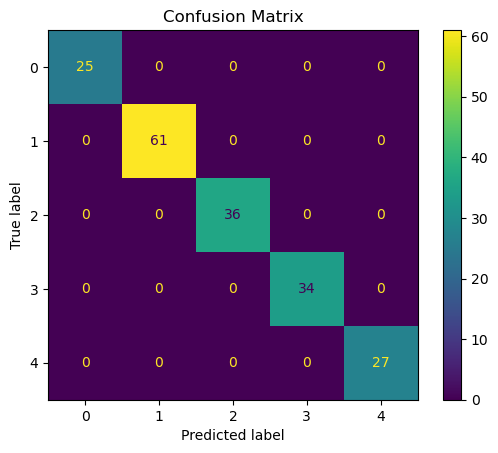

In [18]:
from sklearn import metrics
confusionMatrix = metrics.confusion_matrix(y, rounded_predictions)
confusionMatrixDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix)
confusionMatrixDisplay.plot()
plt.title("Confusion Matrix")
plt.show()

In [19]:
accuracy = metrics.accuracy_score(y, rounded_predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [20]:
X_test = test.copy(deep=True)
X_test.drop(columns=['ancestry'], inplace=True)
ridge_model.fit(X, y)
predictions = ridge_model.predict(X_test)
print(predictions)

[1.04164852 0.14688886 1.96632226 2.91117318 3.73344234]


In [21]:
rounded_predictions = [round(value) for value in predictions] 
print(rounded_predictions)

[1, 0, 2, 3, 4]


In [22]:
train_withPreds['ancestry'].unique()


array(['EastAsian', 'Oceanian', 'African', 'NativeAmerican', 'European'],
      dtype=object)

In [23]:
train_withPreds['ancestryn'].unique()

array([1, 4, 0, 3, 2])

In [24]:
test_withPreds = test.copy(deep=True)
test_withPreds = test_withPreds.assign(pancestry=predictions)
test_withPreds = test_withPreds.assign(prancestry=rounded_predictions)
move_column = test_withPreds.pop('prancestry')
test_withPreds.insert(1, 'prancestry', move_column)
print(test_withPreds)

     ancestry  prancestry  pos1  pos2  pos3  pos4  pos5  pos6  pos7  pos8  \
31   Unknown1           1     1     2     1     2     2     0     2     0   
132  Unknown2           0     1     0     1     1     1     2     2     0   
165  Unknown4           2     2     2     1     0     1     1     1     0   
173  Unknown3           3     0     2     1     1     0     2     2     0   
177  Unknown5           4     0     2     1     1     0     2     2     0   

     ...  pos8908  pos8909  pos8910  pos8911  pos8912  pos8913  pos8914  \
31   ...        0        0        0        0        0        1        0   
132  ...        0        1        1        0        0        1        0   
165  ...        0        0        2        0        0        1        0   
173  ...        0        0        0        1        1        2        0   
177  ...        0        0        0        1        2        1        0   

     pos8915  pos8916  pancestry  
31         0        0   1.041649  
132        0    

In [25]:
print("Ancestry----------Prediction")
print("----------------------------")
print("Unknown1----------EastAsian")
print("Unknown2----------African")
print("Unknown3----------NativeAmerican")
print("Unknown4----------European")
print("Unknown5----------Oceanian")

Ancestry----------Prediction
----------------------------
Unknown1----------EastAsian
Unknown2----------African
Unknown3----------NativeAmerican
Unknown4----------European
Unknown5----------Oceanian
